# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ridho Kurniawan Utama
- **Email:** crtvee.email@gmail.com 
- **ID Dicoding:** llewxam

## Menentukan Pertanyaan Bisnis

- What is the most high-selling product?
- Rate of order cancelled and order delivered
- Geolocation of the highest consumer
- Most used Payment mode

## Import Semua Packages/Library yang Digunakan

In [22]:
pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Data Wrangling

### Gathering Data

Fase ini digunakan untuk mendefinisikan dataset yang akan digunakan dalam analisis, yaitu:

Brazilian E-Commerce Public Dataset by Olist

Dataset ini berisi berbagai informasi terkait transaksi e-commerce di Brasil, mencakup detail pelanggan, pesanan, pembayaran, produk, dan ulasan.

Sumber:
[Kaggle - Brazilian E-Commerce Dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

In [24]:
customers = pd.read_csv('data/customers_dataset.csv')
geolocation = pd.read_csv('data/geolocation_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
product_category_name_translation = pd.read_csv('data/product_category_name_translation.csv')
order_payments = pd.read_csv('data/order_payments_dataset.csv')
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
orders = pd.read_csv('data/orders_dataset.csv')
products = pd.read_csv('data/products_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')

**Insight:**
- Data tertulis dengan bahasa latin / portugis

### Assessing Data

Fase ini digunakan untuk memeriksa kualitas data, seperti:

1. Mendeteksi Data yang Hilang
    - Mengecek apakah ada nilai kosong atau null dalam dataset yang perlu ditangani.
2. Mencari Data Duplikat
    - Mengidentifikasi dan menghapus entri duplikat yang bisa mempengaruhi analisis.
3. Memeriksa Tipe Data
    - Mengevaluasi tipe data di setiap kolom untuk memastikan sesuai dengan yang diharapkan, seperti datetime, numeric, atau categorical.

In [25]:
customers.shape
customers.info()
customers.isnull().sum()
customers.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [26]:
geolocation.shape
geolocation.info()
geolocation.isnull().sum()
geolocation.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [27]:
order_items.shape
order_items.info()
order_items.isnull().sum()
order_items.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [28]:
product_category_name_translation.shape
product_category_name_translation.info()
product_category_name_translation.isnull().sum()
product_category_name_translation.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


product_category_name            object
product_category_name_english    object
dtype: object

In [29]:
order_payments.shape
order_payments.info()
order_payments.isnull().sum()
order_payments.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [30]:
order_reviews.shape
order_reviews.info()
order_reviews.isnull().sum()
order_reviews.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [31]:
orders.shape
orders.info()
orders.isnull().sum()
orders.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [32]:
products.shape
products.info()
products.isnull().sum()
products.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [33]:
sellers.shape
sellers.info()
sellers.isnull().sum()
sellers.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

**Insight:**
- Berberapa Missing Value pada data product dataset
- Berberapa Missing Value pada order status dataset
- data Customer, Geolokasi, dan Seller lengkap

### Cleaning Data

Fase ini digunakan untuk pembersihan data seperti,
1. Mengonversi Kolom Waktu ke Format Datetime
    - Mengubah kolom yang berisi informasi waktu (order_purchase_timestamp, order_delivered_customer_date, dan shipping_limit_date) ke dalam format datetime agar lebih mudah diolah dan dianalisis.
    - Ini berguna untuk analisis tren waktu, perhitungan durasi pengiriman, atau pengelompokan berdasarkan tanggal.
2. Menangani Data yang Hilang dalam Tanggal Pengiriman
   - Mengisi nilai NaN dalam order_delivered_customer_date dengan string 'Not delivered' untuk menandai pesanan yang belum dikirim.
    - Ini memastikan data lebih rapi dan tidak mengganggu analisis ketika memeriksa status pengiriman.
3. Menghapus duplikat dalam dataset geolocation: Remove duplicates in the geolocation dataset.
    - Menghapus baris yang duplikat dalam dataset geolocation untuk menghindari pengulangan data lokasi yang bisa memengaruhi analisis spasial.
    - Ini membantu menjaga integritas data sebelum digunakan lebih lanjut.

In [34]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

orders['order_delivered_customer_date'].fillna('Not delivered', inplace=True)

geolocation.drop_duplicates(inplace=True)


C:\Users\kurni\AppData\Local\Temp\ipykernel_2076\767984793.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['order_delivered_customer_date'].fillna('Not delivered', inplace=True)
C:\Users\kurni\AppData\Local\Temp\ipykernel_2076\767984793.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not delivered' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  orders['order_delivered_customer_dat

## Exploratory Data Analysis (EDA)

Fungsi ini digunakan untuk melakukan analisis eksploratif dasar pada dataset, seperti:
1. Menganalisis Statistik Harga Produk
    - Menampilkan ringkasan statistik harga dari dataset order_items, termasuk nilai rata-rata, standar deviasi, nilai minimum, maksimum, dan persentil.
2. Memeriksa Distribusi Status Pesanan
    - Menghitung jumlah masing-masing status pesanan (seperti delivered, canceled, shipped) dalam dataset orders untuk memahami pola status pesanan.
3. Memeriksa Distribusi Jenis Pembayaran
    - Menghitung jumlah setiap metode pembayaran (seperti credit card, boleto, debit card) dalam dataset order_payments untuk melihat metode pembayaran yang paling sering digunakan.
4. Menganalisis Hubungan antara Kategori Produk dan Jumlah Penjualan
    - Mengelompokkan data berdasarkan product_category_name dari dataset products, lalu menghitung jumlah total transaksi per kategori untuk melihat kategori produk yang paling banyak terjual.
5. Menganalisis Tren Penjualan Berdasarkan Waktu
    - Mengelompokkan pesanan berdasarkan order_purchase_timestamp dari dataset orders, lalu menganalisis tren jumlah pesanan per bulan untuk melihat pola musiman dalam penjualan.

### Explore ...

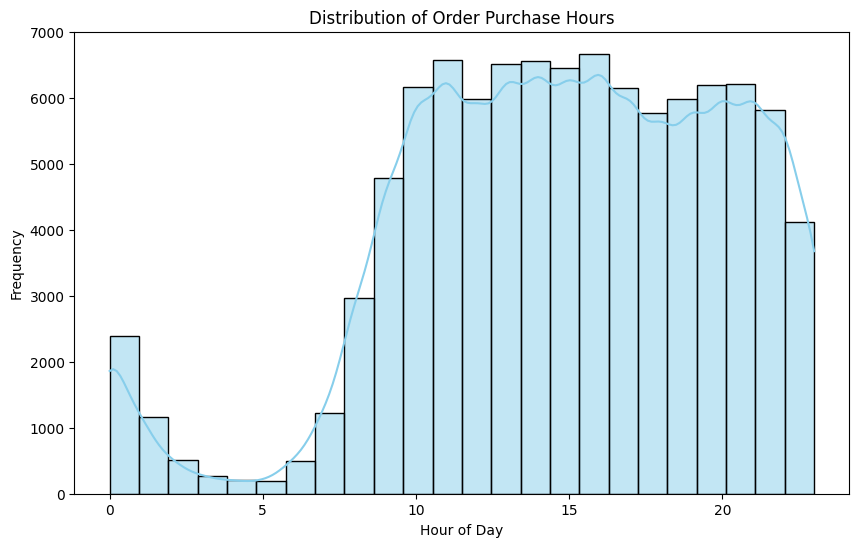

C:\Users\kurni\AppData\Local\Temp\ipykernel_2076\1353598156.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders['order_status'].value_counts().index, y=orders['order_status'].value_counts().values, palette='viridis')


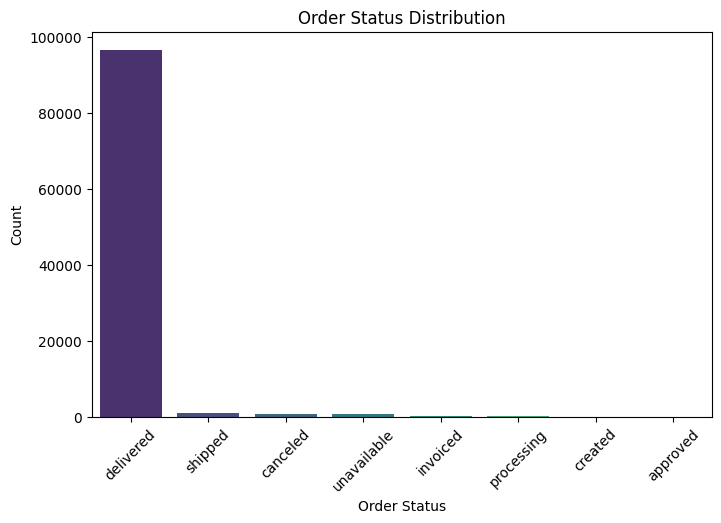

In [35]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

orders['purchase_hour'] = orders['order_purchase_timestamp'].dt.hour
orders['purchase_hour'].describe()

plt.figure(figsize=(10, 6))
sns.histplot(orders['purchase_hour'], bins=24, kde=True, color='skyblue')
plt.title('Distribution of Order Purchase Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

orders['order_status'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=orders['order_status'].value_counts().index, y=orders['order_status'].value_counts().values, palette='viridis')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


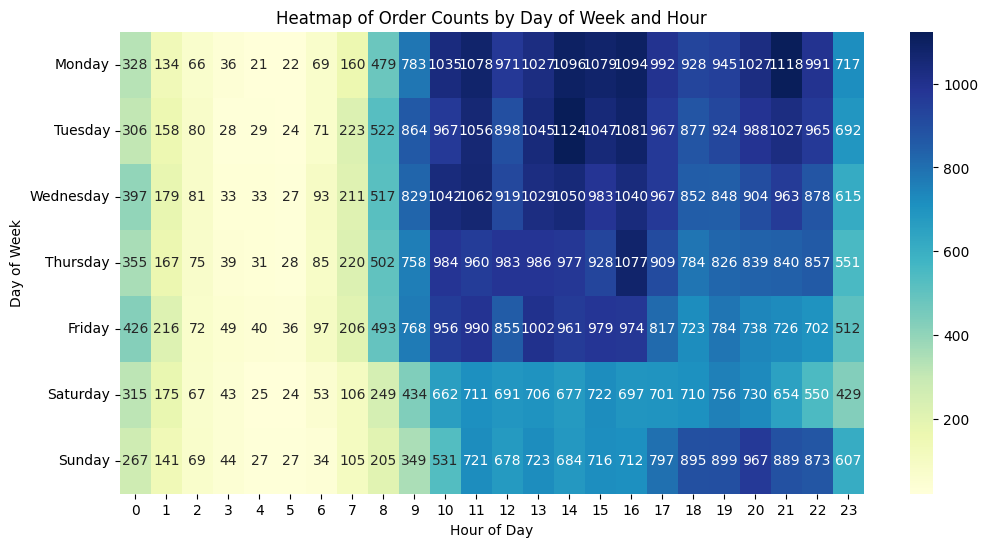

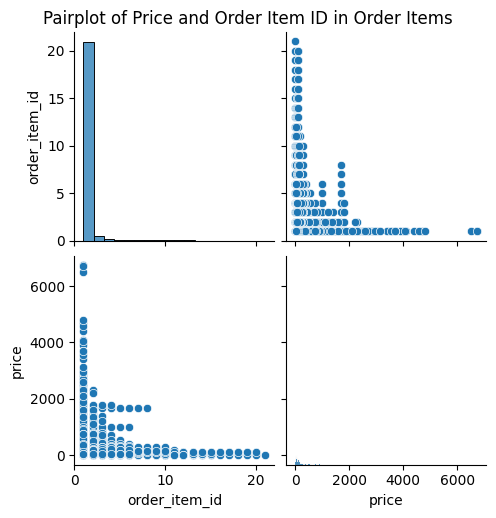

In [36]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['purchase_hour'] = orders['order_purchase_timestamp'].dt.hour
orders['purchase_day'] = orders['order_purchase_timestamp'].dt.day_name()

order_counts = orders.groupby(['purchase_day', 'purchase_hour']).size().reset_index(name='count')
pivot_table = order_counts.pivot(index='purchase_day', columns='purchase_hour', values='count')

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(days_order)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of Order Counts by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

sns.pairplot(order_items[['order_item_id', 'price']], diag_kind='hist')
plt.suptitle('Pairplot of Price and Order Item ID in Order Items', y=1.02)
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Fase ini digunakan untuk menganalisis produk terlaris berdasarkan jumlah penjualan.

Langkah-langkah analisis : 
1. Mengelompokkan data berdasarkan product_id, lalu menghitung jumlah pesanan (order_item_id) dan total pendapatan (price).  
2. Menghubungkan data produk dengan kategori produk menggunakan dataset products.
3. Menerjemahkan kategori produk ke bahasa Inggris menggunakan product_category_name_translation.
4. Menampilkan 10 produk terlaris dalam bentuk bar chart dengan Sales Volume sebagai sumbu X dan kategori produk sebagai sumbu Y.
5. Mencetak daftar 10 produk terlaris beserta jumlah penjualan dan total pendapatan.


Output:

 - Visualisasi Top 10 produk terlaris berdasarkan jumlah penjualan.
 - Tabel yang menampilkan kategori produk, jumlah penjualan, dan total pendapatan.

C:\Users\kurni\AppData\Local\Temp\ipykernel_2076\3867462332.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='order_item_id', y='product_category_name_english', palette='viridis')


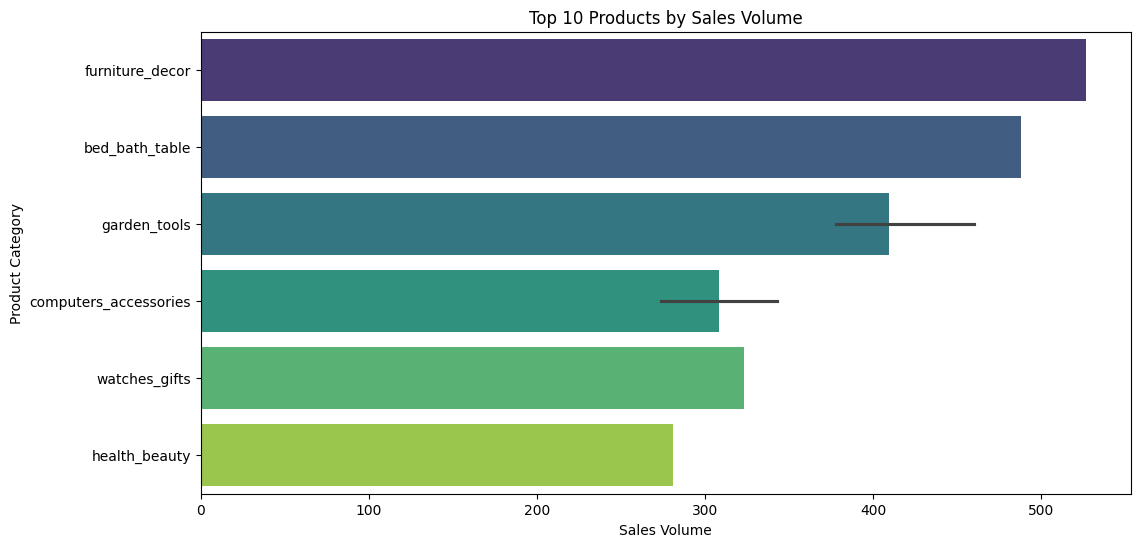

,product_category_name_english,order_item_id,price
22112,furniture_decor,527,37608.90
19742,bed_bath_table,488,43025.56
8613,garden_tools,484,26577.22
7364,garden_tools,392,21440.59
7079,garden_tools,388,21056.80
10840,garden_tools,373,20387.20
27039,computers_accessories,343,47214.51
10867,watches_gifts,323,37683.42
2794,health_beauty,281,6325.19
8051,computers_accessories,274,41082.60


In [37]:
product_sales = order_items.groupby('product_id').agg({
    'order_item_id': 'count',
    'price': 'sum'
}).reset_index()

product_sales = product_sales.merge(products[['product_id', 'product_category_name']], on='product_id')
product_sales = product_sales.merge(product_category_name_translation, on='product_category_name', how='left')

plt.figure(figsize=(12, 6))
top_10 = product_sales.nlargest(10, 'order_item_id')
sns.barplot(data=top_10, x='order_item_id', y='product_category_name_english', palette='viridis')
plt.title('Top 10 Products by Sales Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Product Category')
plt.show()

top_10[['product_category_name_english', 'order_item_id', 'price']]


### Pertanyaan 2:

Fase ini digunakan untuk menganalisis distribusi status pesanan dalam dataset.

Langkah-langkah analisis:
1. Menghitung jumlah pesanan untuk setiap status dalam dataset orders.
2. Membuat pie chart (donut chart) untuk memvisualisasikan persentase masing-masing status pesanan.

- Menggunakan autopct='%1.1f%%' untuk menampilkan persentase.
- Menambahkan lingkaran putih di tengah agar berbentuk donut chart.
    
    3. Menampilkan legenda dengan kategori status pesanan.
    4. Mencetak jumlah pesanan untuk setiap status dalam bentuk tabel.

Output:

Visualisasi pie chart yang menunjukkan proporsi tiap status pesanan.
Tabel jumlah pesanan berdasarkan status

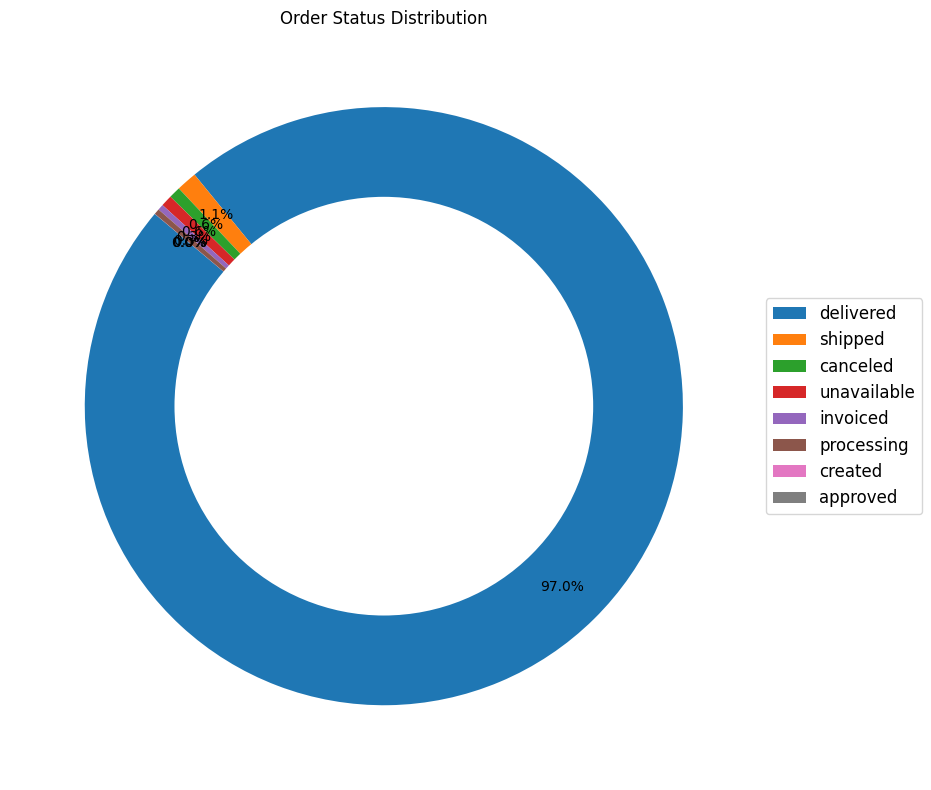

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [38]:
status_counts = orders['order_status'].value_counts()

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    status_counts, autopct='%1.1f%%', startangle=140, pctdistance=0.85
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Order Status Distribution')
plt.legend(wedges, status_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='large')
plt.tight_layout()
plt.show()

status_counts


### Pertanyaan 3:

Fase ini digunakan untuk menganalisis kota dengan jumlah pesanan terbanyak dalam dataset.

Langkah-langkah analisis:
1. Menggabungkan dataset orders dengan customers berdasarkan customer_id.
2. Mengelompokkan data berdasarkan kota (customer_city) dan provinsi (customer_state) untuk menghitung jumlah pesanan di setiap kota.
3. Membuat visualisasi menggunakan bar chart untuk menampilkan 10 kota dengan jumlah pesanan terbanyak.
4. Menampilkan tabel berisi 10 kota teratas dengan jumlah pesanan tertinggi.

Output:

- Grafik batang (bar chart) yang menunjukkan 10 kota dengan pesanan terbanyak.
- Tabel jumlah pesanan per kota berdasarkan data yang telah dihitung. 🚀

C:\Users\kurni\AppData\Local\Temp\ipykernel_2076\1900880307.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_locations.nlargest(10, 'order_count'),


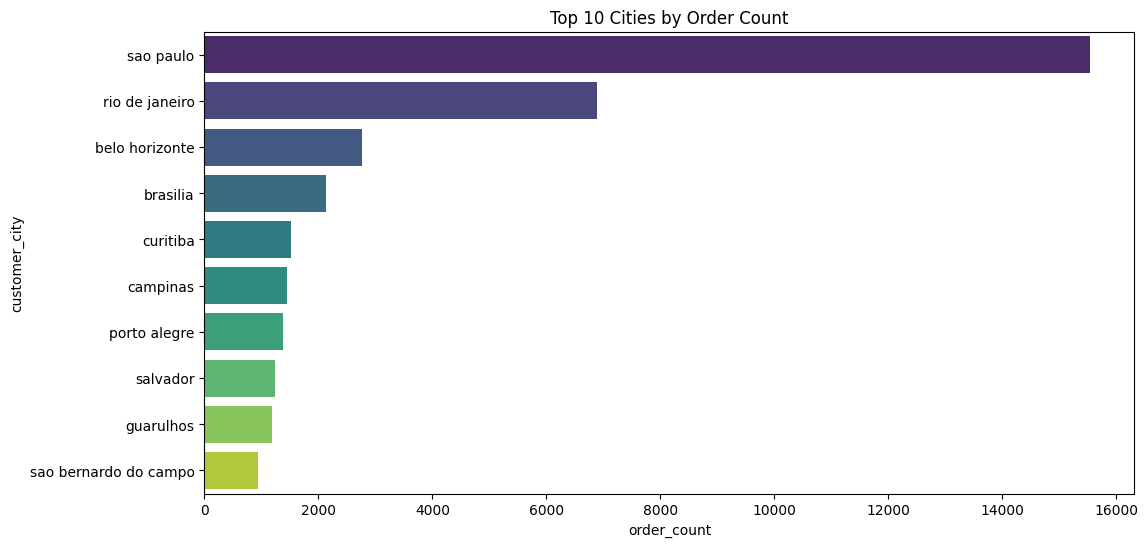

,customer_city,customer_state,order_count
3758,sao paulo,SP,15540
3281,rio de janeiro,RJ,6882
469,belo horizonte,MG,2773
587,brasilia,DF,2131
1187,curitiba,PR,1521
739,campinas,SP,1444
3080,porto alegre,RS,1379
3375,salvador,BA,1245
1587,guarulhos,SP,1189
3574,sao bernardo do campo,SP,938


In [39]:
customer_orders = orders.merge(customers, on='customer_id')
top_locations = customer_orders.groupby(['customer_city', 'customer_state']).size().reset_index(name='order_count')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations.nlargest(10, 'order_count'), 
            x='order_count', y='customer_city', palette='viridis')
plt.title('Top 10 Cities by Order Count')
plt.show()

top_locations.nlargest(10, 'order_count')


### Pertanyaan 4:

Fase ini digunakan untuk menganalisis distribusi metode pembayaran dalam dataset.

Langkah-langkah analisis:
1. Menghitung jumlah transaksi berdasarkan metode pembayaran (payment_type).
2. Membuat visualisasi menggunakan bar chart untuk menampilkan distribusi metode pembayaran.
3. Menampilkan tabel dengan jumlah penggunaan setiap metode pembayaran.

Output:

- Grafik batang (bar chart) yang menunjukkan distribusi metode pembayaran yang digunakan pelanggan.
- Tabel jumlah transaksi per metode pembayaran. 🚀

C:\Users\kurni\AppData\Local\Temp\ipykernel_2076\2690297239.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='viridis')


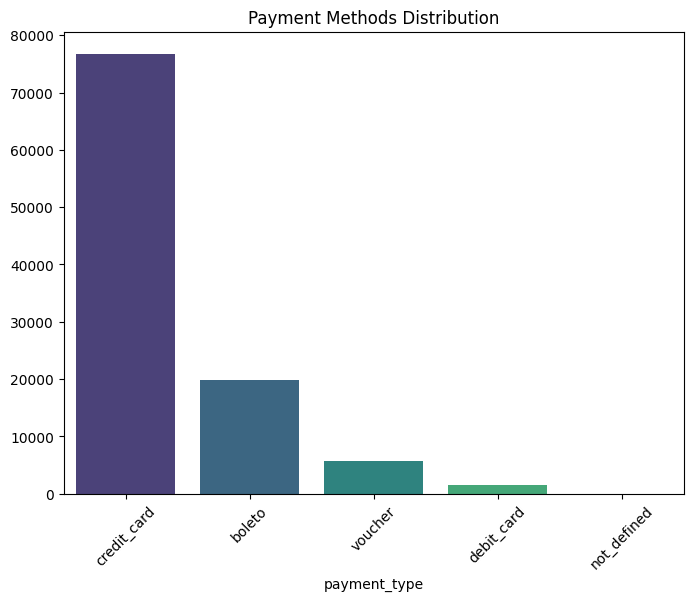

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [40]:
payment_counts = order_payments['payment_type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='viridis')
plt.title('Payment Methods Distribution')
plt.xticks(rotation=45)
plt.show()

payment_counts


**Insight:**
- Furniture Dan Dekor termasuk sebagai High-Value Products
- Order diselesaikan lebih tinggi dari pada order dibatalkan atau ketidak-tersediaan
- Sao Paulo merupakan Kota Tertinggi dari pemesanan
- Kartu Kredit adalah metode pembayaran favorit

## Analisis Lanjutan (Opsional)

Fase ini digunakan untuk menganalisis pelanggan berdasarkan model RFM (Recency, Frequency, Monetary) guna memahami pola pembelian dan segmentasi pelanggan.

Langkah-langkah analisis:
1. Menentukan nilai Recency, Frequency, dan Monetary untuk setiap pelanggan:
    - Recency: Seberapa baru pelanggan melakukan pembelian terakhirnya.
    - Frequency: Seberapa sering pelanggan melakukan transaksi.
    - Monetary: Total uang yang telah dibelanjakan pelanggan.
2. Memberi skor pada masing-masing aspek (R, F, M) dengan 3 kategori: tinggi, menengah, dan rendah.

3. Menyusun segmen pelanggan berdasarkan kombinasi skor RFM (misalnya "Recent - High Frequency - High Spend").

Output:

- 3 grafik distribusi skor untuk Recency, Frequency, dan Monetary.
- Tabel segmentasi pelanggan berdasarkan kombinasi skor RFM.
- Ringkasan jumlah pelanggan di tiap segmen. 🚀

C:\Users\kurni\AppData\Local\Temp\ipykernel_2076\3449559245.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='R_Score', palette='viridis')
C:\Users\kurni\AppData\Local\Temp\ipykernel_2076\3449559245.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='F_Score', palette='viridis')
C:\Users\kurni\AppData\Local\Temp\ipykernel_2076\3449559245.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='M_Score', palette='viridis')


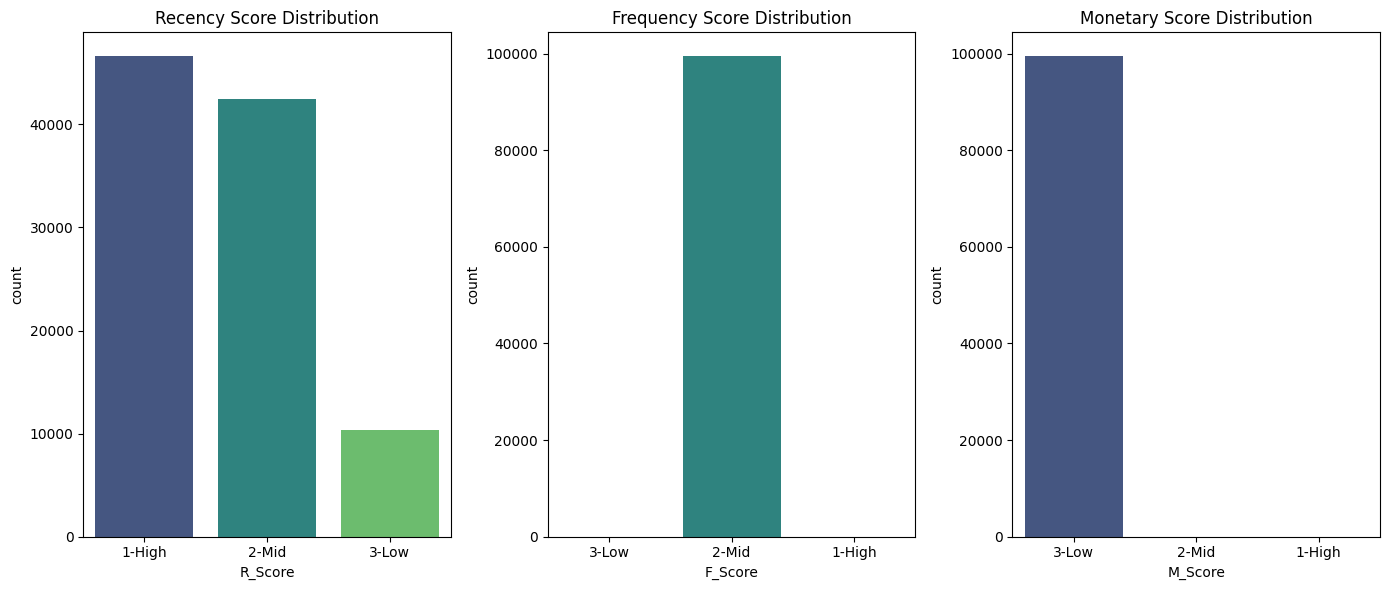

RFM_Score
Recent - Mid Frequency - Low Spend        46592
Mid-Recent - Mid Frequency - Low Spend    42487
Not Recent - Mid Frequency - Low Spend    10351
Recent - Mid Frequency - Mid Spend            4
Not Recent - Mid Frequency - Mid Spend        3
Name: count, dtype: int64

In [41]:
latest_date = orders['order_purchase_timestamp'].max()

order_values = order_payments.groupby('order_id')['payment_value'].sum().reset_index()
orders_with_values = orders.merge(order_values, on='order_id')

rfm = orders_with_values.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

rfm['R_Score'] = pd.cut(rfm['recency'], bins=3, labels=['1-High', '2-Mid', '3-Low'])
rfm['F_Score'] = pd.cut(rfm['frequency'], bins=3, labels=['3-Low', '2-Mid', '1-High'])
rfm['M_Score'] = pd.cut(rfm['monetary'], bins=3, labels=['3-Low', '2-Mid', '1-High'])

def rfm_statement(row):
    recency_map = {'1-High': 'Recent', '2-Mid': 'Mid-Recent', '3-Low': 'Not Recent'}
    frequency_map = {'3-Low': 'Low Frequency', '2-Mid': 'Mid Frequency', '1-High': 'High Frequency'}
    monetary_map = {'3-Low': 'Low Spend', '2-Mid': 'Mid Spend', '1-High': 'High Spend'}
    return f"{recency_map[row['R_Score']]} - {frequency_map[row['F_Score']]} - {monetary_map[row['M_Score']]}"

rfm['RFM_Score'] = rfm.apply(rfm_statement, axis=1)

plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=rfm, x='R_Score', palette='viridis')
plt.title('Recency Score Distribution')

plt.subplot(1, 3, 2)
sns.countplot(data=rfm, x='F_Score', palette='viridis')
plt.title('Frequency Score Distribution')

plt.subplot(1, 3, 3)
sns.countplot(data=rfm, x='M_Score', palette='viridis')
plt.title('Monetary Score Distribution')

plt.tight_layout()
plt.show()

rfm['RFM_Score'].value_counts().head()

### Geospatial Analysis : 

Fase ini digunakan untuk analisis geospasial dengan memetakan lokasi pelanggan berdasarkan kode pos dan koordinat geografis.

Langkah-langkah analisis geospasial:
1. Menggabungkan data pelanggan dengan data lokasi geospasial menggunakan kode pos pelanggan dan prefix kode pos geolocation.
2. Menampilkan peta menggunakan Folium dengan marker berbentuk lingkaran merah yang menunjukkan lokasi pelanggan berdasarkan koordinat latitude dan longitude.
3. Menyimpan peta dalam format HTML yang dapat dibuka di browser untuk melihat distribusi pelanggan.

Output:

- Peta distribusi pelanggan dengan marker untuk 1000 pelanggan pertama.
- File HTML yang menyimpan peta yang dapat diakses langsung. 🗺️

In [42]:
customer_locations = customers.merge(
    geolocation[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
).drop_duplicates()

m = folium.Map(location=[-14.235, -51.925], zoom_start=4)

for idx, row in customer_locations.head(1000).iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=3,
        popup=f"City: {row['customer_city']}",
        color='red',
        fill=True
    ).add_to(m)

m.save('customer_distribution.html')

customer_locations


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.515413,-47.398194
...,...,...,...,...,...,...,...,...
10327723,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703,-23.598092,-46.904582
10327724,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703,-23.594171,-46.908091
10327725,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703,-23.599369,-46.905603
10327726,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703,-23.584425,-46.892014


### Clustering : 

Fase ini digunakan untuk clustering pelanggan berdasarkan dua faktor utama: frekuensi pembelian dan nilai pengeluaran.

Langkah-langkah clustering:
1. Menggabungkan data pesanan dengan pembayaran untuk merangkum informasi berdasarkan ID pelanggan.
2. Menghitung dua segmen pelanggan:
    - Segmen frekuensi: Berapa kali pelanggan melakukan pembelian, dibagi menjadi tiga kategori: Low, Medium, dan High.
    - Segmen pengeluaran: Berapa banyak yang dibelanjakan pelanggan, dibagi menjadi tiga kategori: Budget, Regular, dan Premium.
3. Menyatukan kedua segmen menjadi satu kolom baru yang disebut customer_segment, yang menggabungkan segmen frekuensi dan pengeluaran.
4. Visualisasi distribusi masing-masing segmen menggunakan countplot dengan dua plot:
    - Distribusi segmen frekuensi
    - Distribusi segmen pengeluaran

Output:

- Clustering pelanggan berdasarkan frekuensi dan pengeluaran.
- Ringkasan segmentasi ditampilkan dengan frekuensi segmentasi yang menunjukkan distribusi pelanggan dalam segmen-segmen tersebut.

C:\Users\kurni\AppData\Local\Temp\ipykernel_2076\3059416338.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_summary, x='frequency_segment', palette='viridis')
C:\Users\kurni\AppData\Local\Temp\ipykernel_2076\3059416338.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_summary, x='spending_segment', palette='viridis')


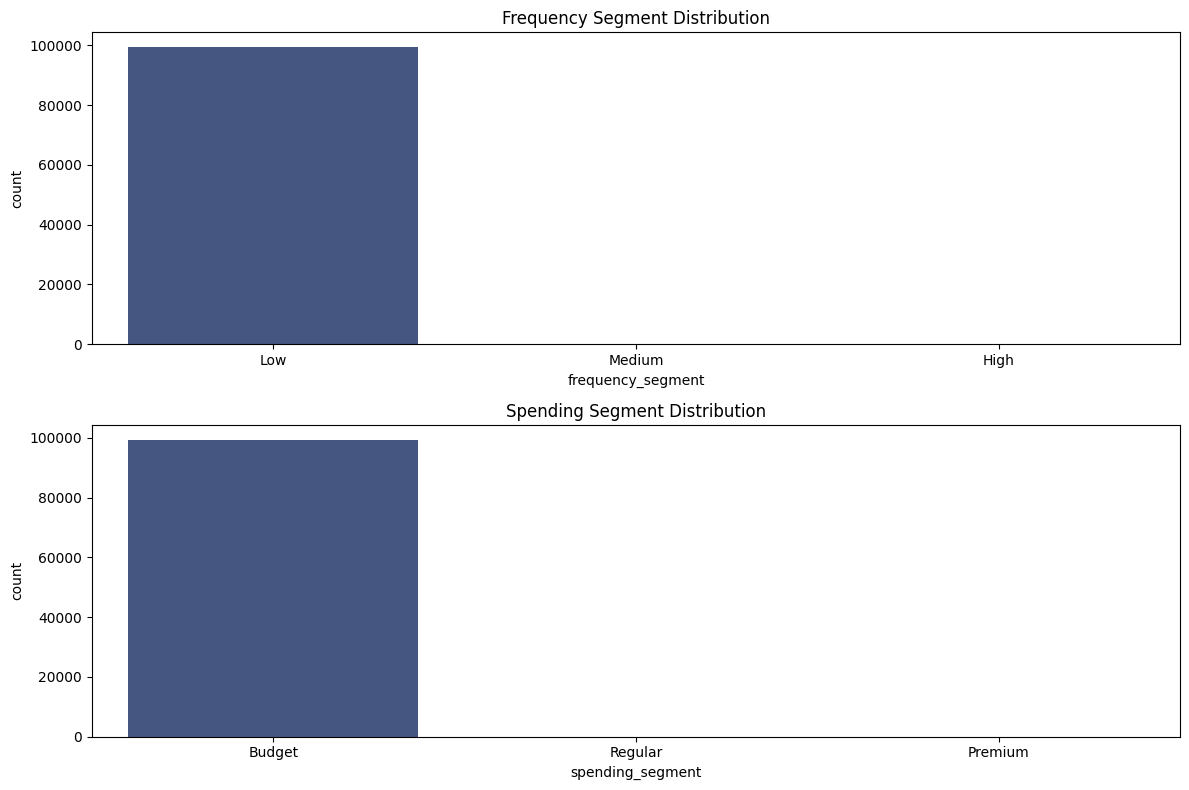

customer_segment
Low_Budget       99401
Medium_Budget       25
Low_Regular          9
High_Budget          4
Low_Premium          1
Name: count, dtype: int64

In [43]:
order_summary = orders.merge(order_payments, on='order_id')
customer_summary = order_summary.groupby('customer_id').agg({
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

customer_summary['frequency_segment'] = pd.cut(
    customer_summary['order_id'],
    bins=3,
    labels=['Low', 'Medium', 'High']
)
customer_summary['spending_segment'] = pd.cut(
    customer_summary['payment_value'],
    bins=3,
    labels=['Budget', 'Regular', 'Premium']
)
customer_summary['customer_segment'] = customer_summary['frequency_segment'].astype(str) + '_' + customer_summary['spending_segment'].astype(str)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.countplot(data=customer_summary, x='frequency_segment', palette='viridis')
plt.title('Frequency Segment Distribution')

plt.subplot(2, 1, 2)
sns.countplot(data=customer_summary, x='spending_segment', palette='viridis')
plt.title('Spending Segment Distribution')

plt.tight_layout()
plt.show()

customer_summary['customer_segment'].value_counts().head()


## Conclusion

# **Kesimpulan & Rekomendasi dari Analisis Data**

## 1. Kategori Produk yang Paling Sering Dibeli
**Kesimpulan:**  
- Kategori *Decor / Furniture* adalah barang yang paling sering dibeli berdasarkan volume penjualan.  
- Hal ini menunjukkan bahwa produk-produk dalam kategori ini memiliki daya tarik yang tinggi bagi pelanggan.  

**Rekomendasi:**  
- Perusahaan dapat meningkatkan stok dan variasi produk dalam kategori ini untuk memenuhi permintaan pasar.  
- Mengoptimalkan strategi pemasaran, seperti memberikan diskon atau bundling produk dekorasi dan furnitur.  

---

## 2. Status Pengiriman Pesanan
**Kesimpulan:**  
- Sebanyak **97% pesanan telah berhasil dikirimkan**, sementara hanya **0.6% yang dibatalkan**.  
- Ini menunjukkan bahwa sistem logistik berjalan cukup baik dan sebagian besar pelanggan menerima barang mereka tepat waktu.  

**Rekomendasi:**  
- Melakukan analisis lebih dalam terhadap pesanan yang dibatalkan untuk memahami penyebab utama pembatalan.  
- Mengoptimalkan transparansi pelacakan pesanan untuk meningkatkan kepercayaan pelanggan.  

---

## 3. Wilayah dengan Konsumen Tertinggi
**Kesimpulan:**  
- **Sao Paulo** merupakan daerah dengan jumlah konsumen tertinggi di Brasil.  
- Hal ini menunjukkan bahwa wilayah ini memiliki potensi besar dalam meningkatkan penjualan dan strategi pemasaran.  

**Rekomendasi:**  
- Fokus pada kampanye pemasaran yang lebih agresif di Sao Paulo untuk mempertahankan dan menarik lebih banyak pelanggan.  
- Memastikan infrastruktur logistik yang optimal untuk memenuhi permintaan yang tinggi di wilayah ini.  

---

## 4. Metode Pembayaran yang Paling Banyak Digunakan
**Kesimpulan:**  
- **Kartu Kredit merupakan metode pembayaran tertinggi setelah Boleto.**  
- Ini menunjukkan bahwa pelanggan cenderung memilih pembayaran menggunakan kartu kredit dibandingkan metode lain.  

**Rekomendasi:**  
- Menyediakan lebih banyak opsi pembayaran yang fleksibel, seperti cicilan tanpa bunga atau program loyalitas bagi pengguna kartu kredit.  
- Meneliti lebih lanjut alasan pelanggan masih menggunakan *Boleto* dan mencari cara untuk meningkatkan adopsi metode pembayaran digital lainnya.  
